# 문제정의

2015년 후생노동청에서 일본인구동태통계에 의하면 사망자의 약60%가 생활습관병이 원인이 되고있습니다.  
생활습관병은 불규칙한 식습관과 수면패턴이 주로 원인이 되고있으며, 대표적인 생활습관병으로는 고혈압, 당뇨병, 치매등이 있습니다.  
특히, 세계적으로도 당뇨병자수가 급증하고있으며, 국제당뇨병연합은 2045년에 환자수가 6.3억명으로 증가한다고 예상하고있습니다.  
초기에 발견되지 않는다면 합병증인 뇌경색이나 심근경색증등이 발생될 수 있습니다.  



## 그림1. 사망원인 - 생활습관병

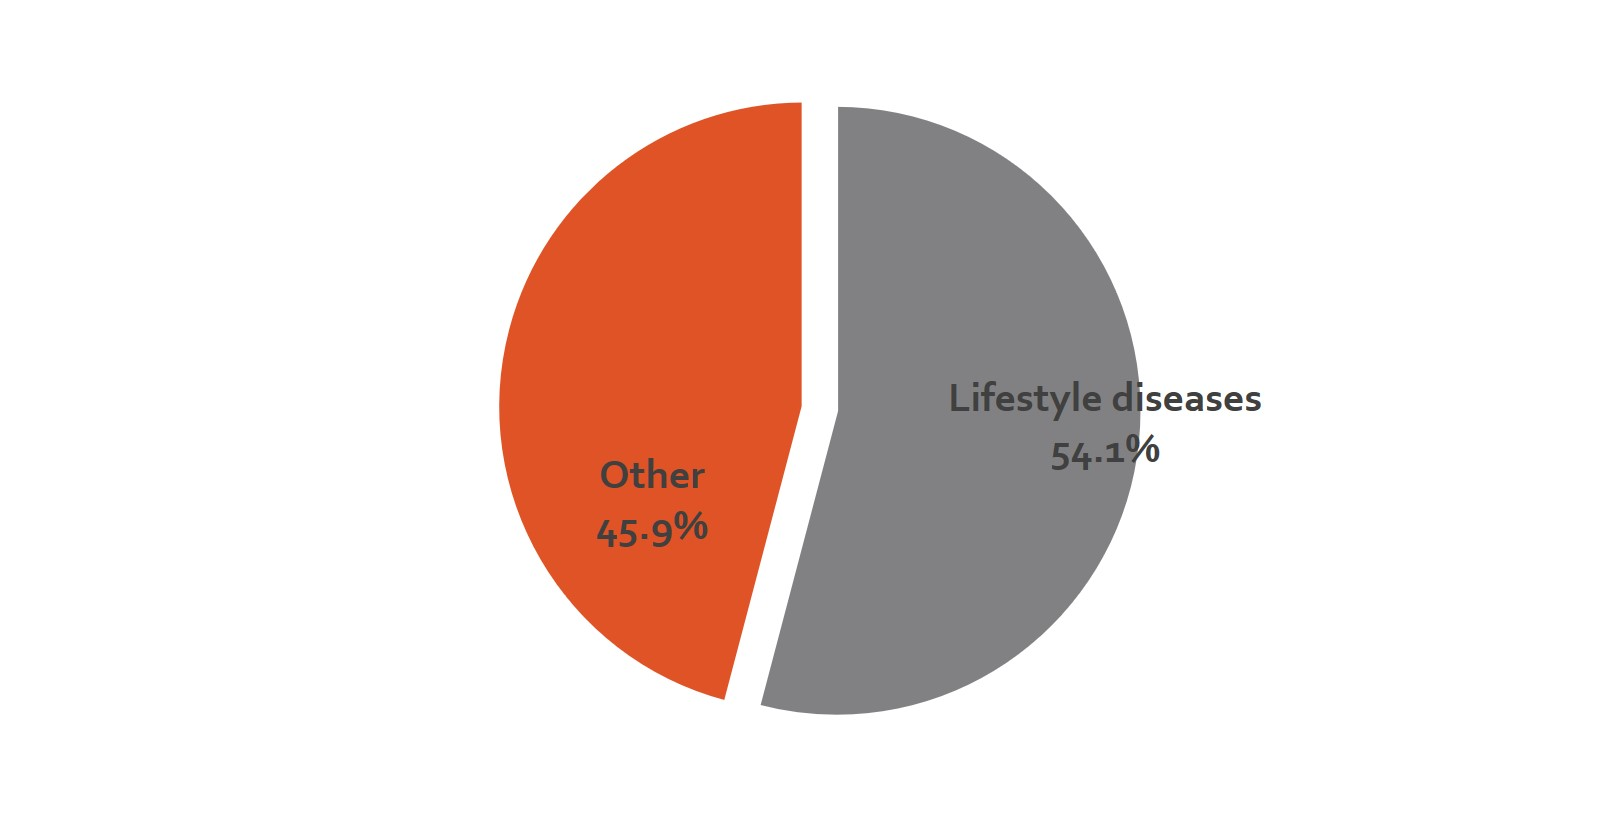

In [2]:
from IPython.display import Image
Image("data/related_disease.JPG")

Fig.1：The demographic statistics of Japan, 2015   
(source : Demographic Statistics, Ministry of Health, 2015  


# 데이터 설명

Pima Indian 데이터는 21살 이상의 여성을 대상으로 하여 정상인 500명과 당뇨병환자 268명으로 총 768명에 대한 데이터입니다.  
데이터 항목으로는 임신횟수, 글루코스, 혈압, 피부두께, 인슐린, BMI, 당뇨병유전지수, 연령으로 총 8개의 항목으로 이루어져있는 데이터입니다. 


In [49]:
# 데이터 가져오기
import pandas as pd

df = pd.read_excel("data/pima_data.xlsx")

print("Data Size:",len(df))

df.describe()

Data Size: 768


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# 데이터 전처리

데이터의 전처리로는 1-class SVM을 이용해서 10퍼센트(nu = 0.9)의 이상치를 제거하였습니다.
Matlab R2019a를 이용해서 정상인과 당뇨병환자를 나누어서 이상치를 검출하였습니다.
그 결과, 정상인 452명, 당뇨병환자 243명에 대한 분석을 진행하게 되었습니다.

파이썬 코드로 변환하면, 

In [50]:
X = df[df.columns[:-1]]
y = df['Outcome']

In [51]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [52]:
import numpy as np
from sklearn.svm import OneClassSVM

clf = OneClassSVM(nu=0.092, max_iter=100000).fit(X_scaled)
outlier = clf.predict(X_scaled)
pd.Series(clf.predict(X_scaled)).value_counts()

 1    695
-1     73
dtype: int64

In [53]:
df['outlier'] = outlier

In [ ]:
------지우세요여기부터

In [54]:
# 원본과 비교

In [55]:
m_df = pd.read_excel("data/pima_data_osvm_matlab.xlsx")

In [56]:
len(df)

768

In [57]:
len(m_df)

695

In [58]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'outlier'],
      dtype='object')

In [59]:
m_df.columns = df.columns[:-1]

In [60]:
m_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [61]:
tmp_df = pd.merge(df,m_df,how='left',on=m_df.columns[:-1].tolist())

In [62]:
tmp_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome_x,outlier,Outcome_y
0,1,85,66,29,0,26.6,0.351,31,0,1,0.0
1,1,89,66,23,94,28.1,0.167,21,0,1,0.0
2,5,116,74,0,0,25.6,0.201,30,0,1,0.0
3,10,115,0,0,0,35.3,0.134,29,0,-1,0.0
4,4,110,92,0,0,37.6,0.191,30,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...
763,1,128,88,39,110,36.5,1.057,37,1,1,1.0
764,0,123,72,0,0,36.3,0.258,52,1,1,1.0
765,6,190,92,0,0,35.5,0.278,66,1,1,1.0
766,9,170,74,31,0,44.0,0.403,43,1,1,1.0


In [63]:
# outcome_y는 matlab결과고 null이라면 아웃라이어라서 제거가 되었다
# 그 아웃라이어들이 잘 제거 되었는지 확인

tmp_df.loc[tmp_df['Outcome_y'].isnull()]['outlier'].sum()

73

In [65]:
tmp_df.loc[tmp_df['outlier'] == -1]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome_x,outlier,Outcome_y
3,10,115,0,0,0,35.3,0.134,29,0,-1,0.0
5,10,139,80,0,0,27.1,1.441,57,0,-1,0.0
24,7,105,0,0,0,0.0,0.305,24,0,-1,0.0
30,0,100,88,60,110,46.8,0.962,31,0,-1,0.0
31,0,146,82,0,0,40.5,1.781,44,0,-1,0.0
...,...,...,...,...,...,...,...,...,...,...,...
723,2,155,52,27,540,38.7,0.240,25,1,-1,1.0
725,1,199,76,43,0,42.9,1.394,22,1,-1,1.0
737,13,158,114,0,0,42.3,0.257,44,1,-1,1.0
743,10,115,0,0,0,0.0,0.261,30,1,-1,1.0


In [ ]:
------지우세요여기까지

outlier가 아닌 데이터만 필터해서 가져온다

In [66]:
normal_df = df.loc[df['outlier'] == 1]

In [67]:
normal_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,outlier
0,1,85,66,29,0,26.6,0.351,31,0,1
1,1,89,66,23,94,28.1,0.167,21,0,1
2,5,116,74,0,0,25.6,0.201,30,0,1
4,4,110,92,0,0,37.6,0.191,30,0,1
6,1,103,30,38,83,43.3,0.183,33,0,1
...,...,...,...,...,...,...,...,...,...,...
763,1,128,88,39,110,36.5,1.057,37,1,1
764,0,123,72,0,0,36.3,0.258,52,1,1
765,6,190,92,0,0,35.5,0.278,66,1,1
766,9,170,74,31,0,44.0,0.403,43,1,1


X, y 데이터 나누기

전처리된 데이터를 전체, 정상인만, 당뇨병환자만의 3가지로 분류할 수 있습니다.

In [68]:
#전체
X = normal_df[df.columns[:-2]]
y = normal_df['Outcome']

In [69]:
normal_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'outlier'],
      dtype='object')

In [70]:
health_df = normal_df.loc[normal_df['Outcome'] == 0]

In [71]:
diabetes_df = normal_df.loc[normal_df['Outcome'] == 1]

In [72]:
#정상인
X0 = health_df[health_df.columns[:-2]]
y0 = health_df['Outcome']

In [73]:
#당뇨병 환자
X1 = diabetes_df[diabetes_df.columns[:-2]]
y1 = diabetes_df['Outcome']

In [74]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,85,66,29,0,26.6,0.351,31
1,1,89,66,23,94,28.1,0.167,21
2,5,116,74,0,0,25.6,0.201,30
4,4,110,92,0,0,37.6,0.191,30
6,1,103,30,38,83,43.3,0.183,33


In [75]:
y.head()

0    0
1    0
2    0
4    0
6    0
Name: Outcome, dtype: int64

데이터를 모델링하기 전에 X에 대해서 StandardScaler를 이용해서 스케일링힙니다.

In [76]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [77]:
X_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.880334,-1.161853,-0.236630,0.556001,-0.764427,-0.818295,-0.345798,-0.160856
1,-0.880334,-1.028422,-0.236630,0.163828,0.184462,-0.590256,-1.006487,-1.052361
2,0.369579,-0.127767,0.247248,-1.339499,-0.764427,-0.970321,-0.884404,-0.250006
3,0.057100,-0.327912,1.335973,-1.339499,-0.764427,0.853994,-0.920311,-0.250006
4,-0.880334,-0.561416,-2.414080,1.144259,0.073422,1.720544,-0.949036,0.017445


### 기초분석

기초분석으로 t검정과 상관분석으로 분석하였습니다.
t검정의 결과로 등분산이 동일하다고 가정되는 조건으로 혈압과 피부두께가 0.05보다 크기 때문에 유의미하지 않다고 판단되었습니다.
즉, 정상인과 당뇨병환자사이의 차이가 그다지 없고 동일하다고 판단 되었습니다.  
상관분석으로 요인간의 관련성을 검증할 수 있습니다.
당뇨병에 상관없이 피부두께와 인슐린, 임신횟수와 연령은 관련이 있다고 알 수 있습니다.
정상인과 달리 당뇨병환자에게는 피부두께와 BMI와의 상관수치가 낮은 결과를 알 수 있습니다.


정상인과 당뇨병환자를 나눠 T-test를 진행하였습니다.

In [ ]:
# normal_df는 outlier를 제거한 데이터

In [79]:
X_columns = normal_df.columns[:-2]

In [80]:
#당뇨병환자
df1 = normal_df.loc[normal_df['Outcome']==1,X_columns]

In [81]:
#정상인
df0 = normal_df.loc[normal_df['Outcome']==0,X_columns]

정상인과 당뇨병환자 feature의 평균값

In [82]:
mean_df = pd.concat([df0.mean(),df1.mean()],axis = 1)
mean_df.columns = ['normal','diabetes']

print(mean_df)

                              normal    diabetes
Pregnancies                 3.310195    4.816239
Glucose                   109.596529  139.991453
BloodPressure              68.689805   72.320513
SkinThickness              20.008677   21.448718
Insulin                    68.470716   90.021368
BMI                        30.638395   34.630769
DiabetesPedigreeFunction    0.408514    0.523722
Age                        30.739696   36.871795


두 집단의 평균 차이가 통계적으로 유의미한지 t-검증

In [83]:
import scipy.stats

result = scipy.stats.ttest_ind(df0, df1, equal_var=False)
pd.DataFrame(result.pvalue,index=X_columns,columns=['p_value'])

# 검증 결과, 두 집단의 평균 차이는 통계적으로 유의미함 (p<0.05)

,p_value
Pregnancies,2.427500e-08
Glucose,8.712320e-34
BloodPressure,9.129551e-03
SkinThickness,2.637800e-01
Insulin,1.210494e-02
BMI,1.888147e-15
DiabetesPedigreeFunction,1.519436e-06
Age,5.083804e-12


검증 결과, BloodPressure와 SkinThickness는 0.05보다 크므로 해당 피쳐에 대해서는 두 집단의 평균 차이는 통계적으로 유의미하지 않다

상관관계분석

전체 Pima Indians를 대상으로 한 상관분석

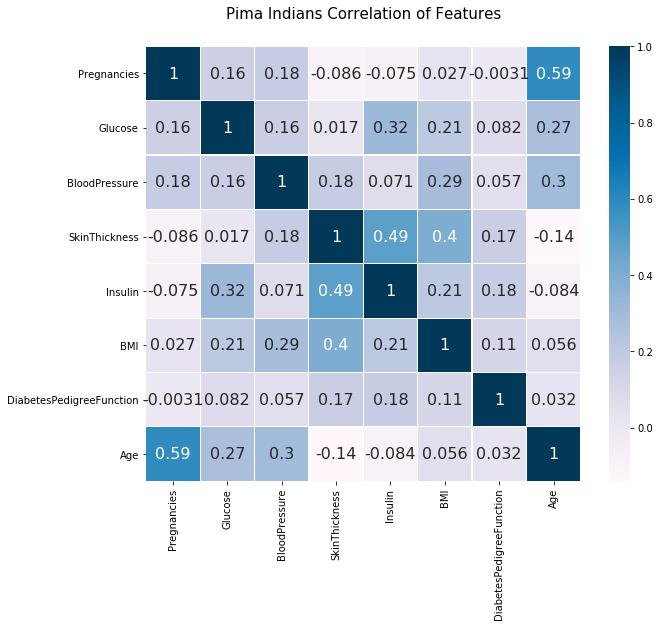

In [84]:
import matplotlib.pyplot as plt 
import seaborn as sns

colormap = plt.cm.PuBu 
plt.figure(figsize=(10, 8)) 
plt.title("Pima Indians Correlation of Features", y = 1.05, size = 15) 
sns.heatmap(X.astype(float).corr(), linewidths = 0.1, vmax = 1.0, square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})


정상인들을 대상으로 한 상관분석

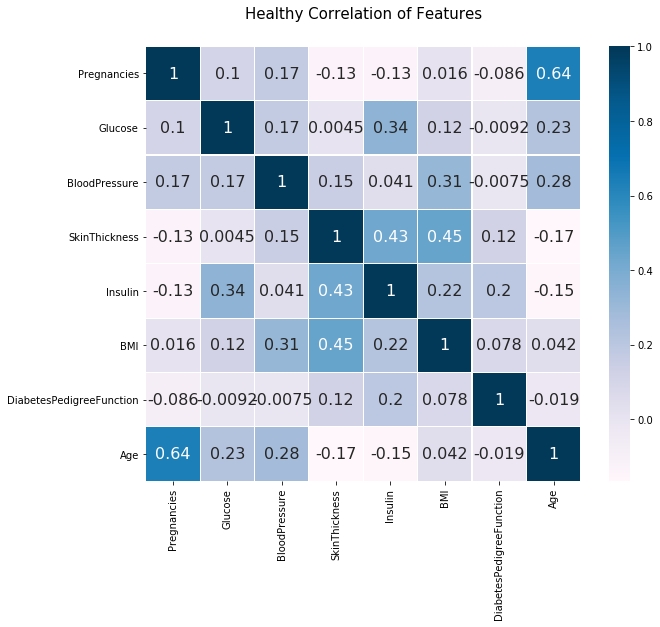

In [85]:
import matplotlib.pyplot as plt 
import seaborn as sns

colormap = plt.cm.PuBu 
plt.figure(figsize=(10, 8)) 
plt.title("Healthy Correlation of Features", y = 1.05, size = 15) 
sns.heatmap(df0.astype(float).corr(), linewidths = 0.1, vmax = 1.0, square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})


당뇨병 환자들을 대상으로 한 상관분석

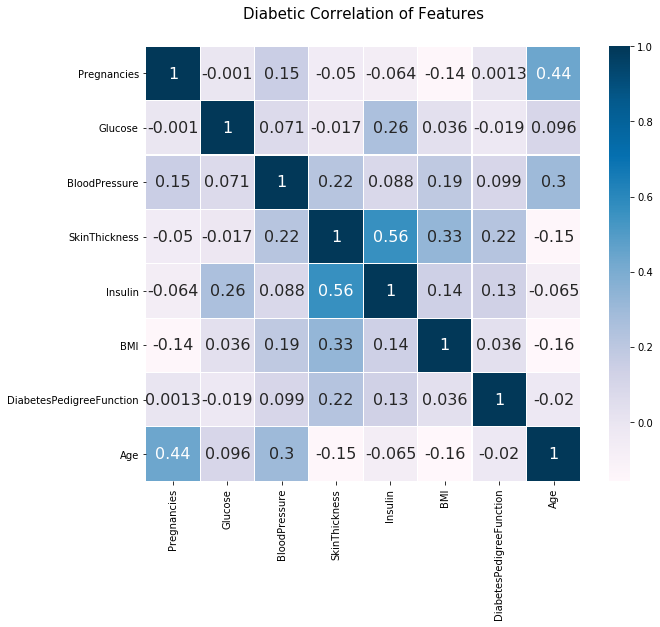

In [86]:
import matplotlib.pyplot as plt 
import seaborn as sns

colormap = plt.cm.PuBu 
plt.figure(figsize=(10, 8)) 
plt.title("Diabetic Correlation of Features", y = 1.05, size = 15) 
sns.heatmap(df1.astype(float).corr(), linewidths = 0.1, vmax = 1.0, square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})


In [ ]:
상관분석 결과 

# 문제 해결방법
머신러닝 기법을 이용하여 모델을 만든다

## 1. 그래피컬라소
        
그래피컬라소는 다변량정규분포의 복잡한구조인 파라미터를 그래프구조로서 변형시켜 이상감지를 추출할수있는 방법중의 하나입니다.  
집단간의 이상감지와 요인간의 의존관계를 효율적으로 분석할 수 있는게 가장 큰 장점입니다.  
또, 그래프구조에서의 요인간의 변화를 확인하고 각 요인에 대한 변화값도 비교할 수 있습니다.  
Pima Indian 중에서 정상인과 당뇨병 환자를 구분해서 그래피컬라소로 나타내어 당뇨병 환자에게는 요인간의 관계를 파악하고 정상인과의 다른점을 비교할 수 있습니다.
그리고 당뇨병에 있어서 영향이 큰 요인을 조사하기 위해 정상인에서 당뇨병환자에서의 각 요인의 변화도를 측정하였습니다.  
그래프상으로 보면 당뇨병환자한테 피부두께와 혈압, 피부두께와 당뇨병유전지수, BMI와연령간의 의존관계를 확인하였습니다.  
특히, BMI와 연령은 변화값도 높은 결과가 나왔습니다.  
        
    
(변수간의 관계성을 그래프로 표시할수있어 변수간의 특징이나 차이점을 쉽게 알 수 있다. 또, 각 항목간의 상관이 있으면 그래프상에 선을 표시해서 변수간의 상관성을 확인 할수도있다.) 

clear;
load ('diabetes.mat');  
%X=AA;  
%[Y]=X(:,end);  
tic  
%%  
%[Y] = SVMModel_c1.predictFcn(X(:,1:end-1));  
%%  
%x_1 = X(Y==0, 1:end-1);  
%x_2 = X(Y==1, 1:end-1);  
rho = 0.2;  
i = []; % 항목  
y_1(:,i)=[];  
y_2(:,i)=[];  
%==============================================  
[LambdaO_1, S_1] = graphic_lasso(y_1, rho);%정상인  
[LambdaO_2, S_2] = graphic_lasso(y_2, rho);%당뇨병 환자  
%% ==============================================
% close all;  
epss = 0.00001; %lambda 설정값  
glasso_graph(LambdaO_1, epss);  
glasso_graph(LambdaO_2, epss);  
%% ==============================================  
Lambda_1 = LambdaO_1;  
% Lambda_1(abs(Lambda_1)<epss) = 0;  
Lambda_2 = LambdaO_2;  
% Lambda_2(abs(Lambda_2)<epss) = 0;  
%==============================================  
[a_12] = [];  
[LSL_1] = Lambda_1*S_1*Lambda_1;  
[LSL_2] = Lambda_2*S_1*Lambda_2;  
for i = 1:size(Lambda_1,1)  
   a_12(i,1) = 1/2 * log(Lambda_1(i,i)/Lambda_2(i,i)) ...  
            -1/2 * (LSL_1(i,i)/Lambda_1(i,i) - LSL_2(i,i)/Lambda_2(i,i));  
end  
%==============================================  
[a_21] = [];  
[LSL_1] = Lambda_2*S_2*Lambda_2;  
[LSL_2] = Lambda_1*S_2*Lambda_1;  
for i = 1:size(Lambda_1,1)  
   a_21(i,1) = 1/2 * log(Lambda_2(i,i)/Lambda_1(i,i)) ...  
            -1/2 * (LSL_1(i,i)/Lambda_2(i,i) - LSL_2(i,i)/Lambda_1(i,i));  
end  
% toc  
[degree_abnormal] = max([a_12 a_21], [], 2);%변화도  

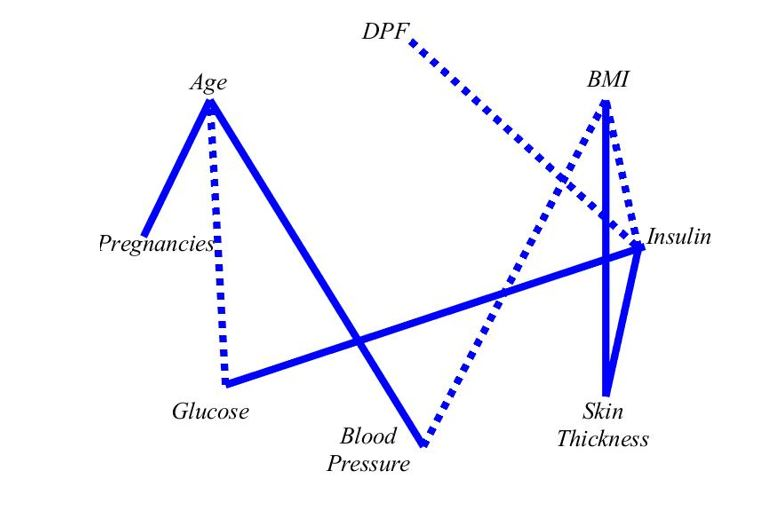

In [8]:
from IPython.display import Image  
Image("data/healthy_GL.JPG")  

non-diabetics

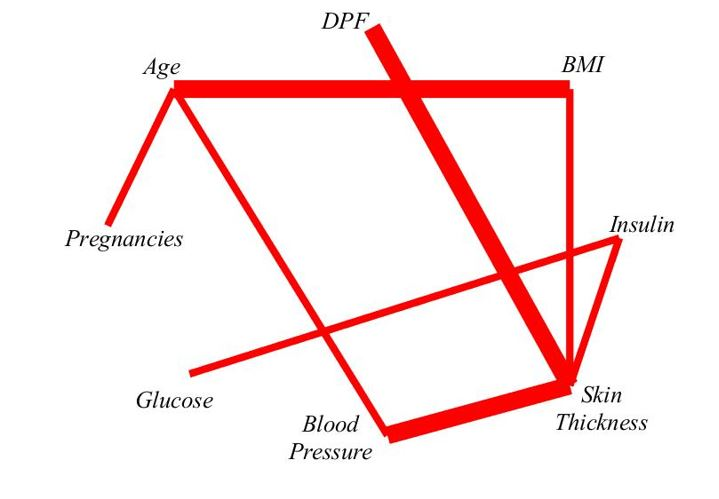

In [9]:
from IPython.display import Image  
Image("data/diabetes_GL.JPG")  

diabetics

## 2. 요인분석

당뇨병 환자에 관한

In [98]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [99]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value = calculate_bartlett_sphericity(df1)
chi_square_value, p_value
# In this Bartlett ’s test, the p-value is 0. 
# The test was statistically significant, 
# indicating that the observed correlation matrix is not an identity matrix.

(274.53020379523343, 2.650799977945653e-42)

In [100]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df1)
kmo_model
# Value of KMO less than 0.6 is considered inadequate.

0.5224646419833954

In [123]:
from factor_analyzer import FactorAnalyzer
# 그리고 요인분석 모델을 불러온다. 불러올 때 요인 개수, 회전 방법 등을 선택할 수 있는데, 
# 일단 요인 개수는 8개, 최대우도방법, promax 회전으로 돌려볼 거다. 
# (파라미터 설정에 대해 좀 더 자세히 알고 싶다면 FactorAnalyzer github를 참고하자.)
fa = FactorAnalyzer(n_factors=3, method="principal", rotation="varimax")
fa.fit(df1)

FactorAnalyzer(method='principal', rotation='varimax', rotation_kwargs={})

In [ ]:
# 왜 principal,varimax를 사용했는지 설명해오기

In [124]:
fa.loadings_

array([[-0.09207064,  0.74748219, -0.04712589],
       [-0.14931909,  0.0824223 ,  0.87098272],
       [ 0.45756808,  0.57561917,  0.02178662],
       [ 0.82344966, -0.06767844,  0.21347766],
       [ 0.52396147, -0.07952157,  0.64329258],
       [ 0.58179765, -0.16241091,  0.01452436],
       [ 0.48541392,  0.09158835, -0.15801379],
       [-0.15223407,  0.83357483,  0.07756885]])

In [125]:
efa_result= pd.DataFrame(fa.loadings_, index=df1.columns)
efa_result

,0,1,2
Pregnancies,-0.092071,0.747482,-0.047126
Glucose,-0.149319,0.082422,0.870983
BloodPressure,0.457568,0.575619,0.021787
SkinThickness,0.823450,-0.067678,0.213478
Insulin,0.523961,-0.079522,0.643293
BMI,0.581798,-0.162411,0.014524
DiabetesPedigreeFunction,0.485414,0.091588,-0.158014
Age,-0.152234,0.833575,0.077569


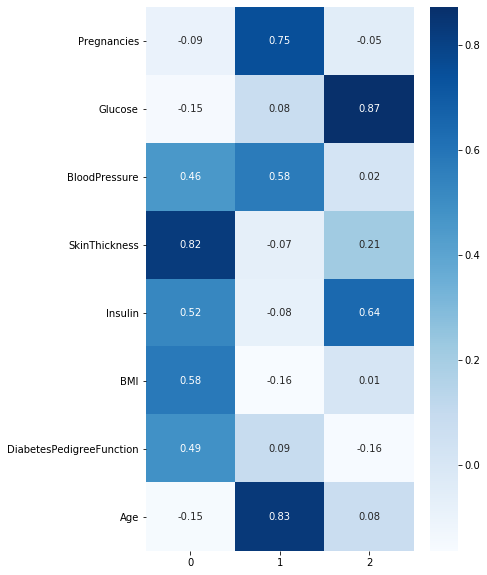

In [126]:
plt.figure(figsize=(6,10))
sns.heatmap(efa_result, cmap="Blues", annot=True, fmt='.2f')

In [135]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value = calculate_bartlett_sphericity(df0)
chi_square_value, p_value
# In this Bartlett ’s test, the p-value is 0. 
# The test was statistically significant, 
# indicating that the observed correlation matrix is not an identity matrix.

(699.2316550318192, 2.8352160063295805e-129)

In [136]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df0)
kmo_model
# Value of KMO less than 0.6 is considered inadequate.

0.5616251134778683

In [137]:
from factor_analyzer import FactorAnalyzer
# 그리고 요인분석 모델을 불러온다. 불러올 때 요인 개수, 회전 방법 등을 선택할 수 있는데, 
# 일단 요인 개수는 8개, 최대우도방법, promax 회전으로 돌려볼 거다. 
# (파라미터 설정에 대해 좀 더 자세히 알고 싶다면 FactorAnalyzer github를 참고하자.)
fa1 = FactorAnalyzer(n_factors=3, method="principal", rotation="varimax")
fa1.fit(df0)

FactorAnalyzer(method='principal', rotation='varimax', rotation_kwargs={})

In [138]:
fa1.loadings_

array([[-0.00211984,  0.8100154 , -0.11289479],
       [-0.07301161,  0.40381   ,  0.74874779],
       [ 0.57795236,  0.44945778, -0.03221167],
       [ 0.73925609, -0.26949776,  0.25363312],
       [ 0.26144985, -0.16919382,  0.80663816],
       [ 0.82180576,  0.05951653,  0.10083924],
       [ 0.07111867, -0.14009047,  0.36522808],
       [ 0.00348463,  0.87923496, -0.02378952]])

In [139]:
efa1_result= pd.DataFrame(fa1.loadings_, index=df0.columns)
efa1_result

,0,1,2
Pregnancies,-0.002120,0.810015,-0.112895
Glucose,-0.073012,0.403810,0.748748
BloodPressure,0.577952,0.449458,-0.032212
SkinThickness,0.739256,-0.269498,0.253633
Insulin,0.261450,-0.169194,0.806638
BMI,0.821806,0.059517,0.100839
DiabetesPedigreeFunction,0.071119,-0.140090,0.365228
Age,0.003485,0.879235,-0.023790


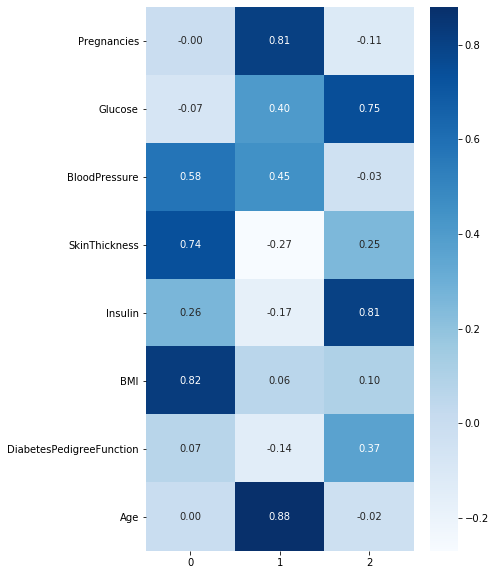

In [140]:
plt.figure(figsize=(6,10))
sns.heatmap(efa1_result, cmap="Blues", annot=True, fmt='.2f')

## 3. 클러스터분석
각 요인들의 특성이나 성질이 비슷하면 군집을 이루는 성질을 이용해서 8개의 요인들을 군집화하였습니다.  
클러스터 분석으로는 계층적 클러스터분석법중의 하나인 Ward법을 이용하였습니다.  
당뇨병 환자 기준으로 3개로 군집이 이루어져 있으며, 제 1 군집으로 임신횟수, 피부두께, 혈압, BMI, 당뇨병유전지수이고   
제 2군집으로 글루코스이고 제3군집으로 인슐린으로 이루어져 있습니다.   
클러스터 분석결과로 당뇨병환자들은 나이가 많을수록 살이 찌기가 쉽고 유전력이 있다는 결과를 얻을 수있습니다.

전체 데이터에 대한 클러스터분석 결과

In [35]:
clustering_df = normal_df[normal_df.columns[:-2]].T

In [36]:
clustering_df

,0,1,2,4,7,8,9,10,11,12,...,756,757,758,759,760,762,763,764,766,767
Pregnancies,1.000,1.000,5.000,4.000,3.000,8.000,1.000,13.000,5.000,5.000,...,9.000,1.000,3.000,6.000,4.000,8.000,1.000,0.000,9.000,1.000
Glucose,85.000,89.000,116.000,110.000,126.000,99.000,97.000,145.000,117.000,109.000,...,140.000,147.000,187.000,162.000,136.000,154.000,128.000,123.000,170.000,126.000
BloodPressure,66.000,66.000,74.000,92.000,88.000,84.000,66.000,82.000,92.000,75.000,...,94.000,94.000,70.000,62.000,70.000,78.000,88.000,72.000,74.000,60.000
SkinThickness,29.000,23.000,0.000,0.000,41.000,0.000,15.000,19.000,0.000,26.000,...,0.000,41.000,22.000,0.000,0.000,32.000,39.000,0.000,31.000,0.000
Insulin,0.000,94.000,0.000,0.000,235.000,0.000,140.000,110.000,0.000,0.000,...,0.000,0.000,200.000,0.000,0.000,0.000,110.000,0.000,0.000,0.000
BMI,26.600,28.100,25.600,37.600,39.300,35.400,23.200,22.200,34.100,36.000,...,32.700,49.300,36.400,24.300,31.200,32.400,36.500,36.300,44.000,30.100
DiabetesPedigreeFunction,0.351,0.167,0.201,0.191,0.704,0.388,0.487,0.245,0.337,0.546,...,0.734,0.358,0.408,0.178,1.182,0.443,1.057,0.258,0.403,0.349
Age,31.000,21.000,30.000,30.000,27.000,50.000,22.000,57.000,38.000,60.000,...,45.000,27.000,36.000,50.000,22.000,45.000,37.000,52.000,43.000,47.000


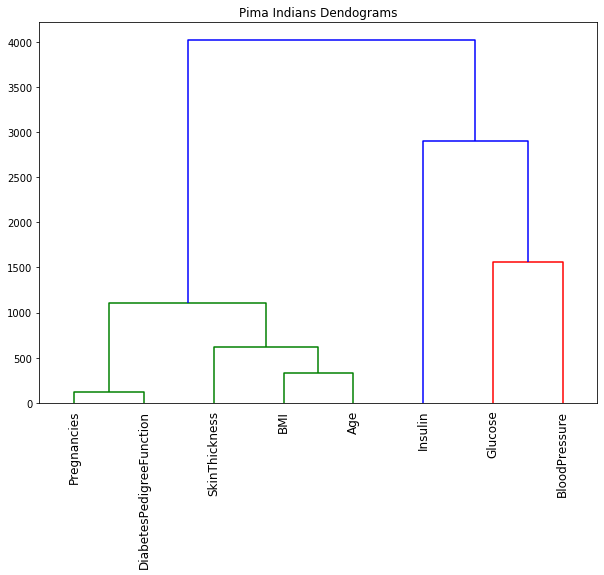

In [37]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Pima Indians Dendograms")
dend = shc.dendrogram(shc.linkage(clustering_df, method='ward'),labels=clustering_df.index)
plt.xticks(rotation=90)
plt.show()

In [38]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
clustering_result = cluster.fit_predict(clustering_df)

In [39]:
den_df = pd.DataFrame([clustering_df.index.tolist(),clustering_result.tolist()]).T
den_df.columns = ['feature_name','cluster']
den_df.sort_values(by=['cluster'])

,feature_name,cluster
1,Glucose,0
2,BloodPressure,0
0,Pregnancies,1
3,SkinThickness,1
5,BMI,1
6,DiabetesPedigreeFunction,1
7,Age,1
4,Insulin,2


In [40]:
den_df['feature_name'] = den_df['feature_name'] + ", "

In [41]:
den_df.groupby('cluster')['feature_name'].sum()

cluster
0                             Glucose, BloodPressure, 
1    Pregnancies, SkinThickness, BMI, DiabetesPedig...
2                                            Insulin, 
Name: feature_name, dtype: object

당뇨병환자들에 대한 클러스터분석결과

In [42]:
clustering0_df = diabetes_df[diabetes_df.columns[:-2]].T

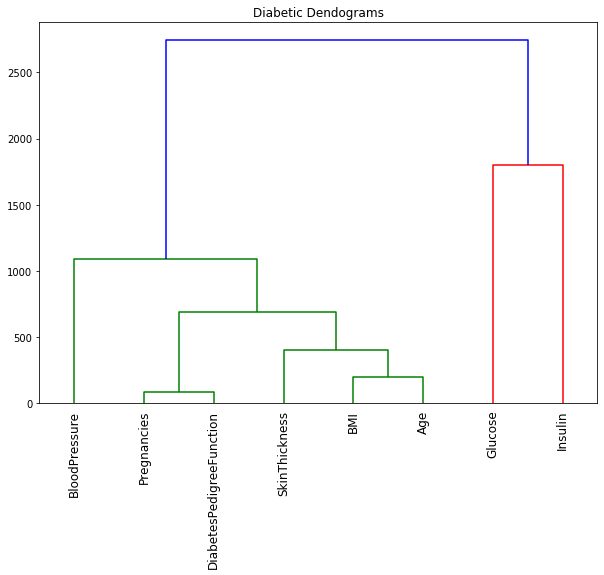

In [43]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Diabetic Dendograms")
dend = shc.dendrogram(shc.linkage(clustering0_df, method='ward'),labels=clustering_df.index)
plt.xticks(rotation=90)
plt.show()

In [44]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
clustering_result = cluster.fit_predict(clustering0_df)

In [45]:
den0_df = pd.DataFrame([clustering0_df.index.tolist(),clustering_result.tolist()]).T
den0_df.columns = ['feature_name','cluster']
den0_df.sort_values(by=['cluster'])

,feature_name,cluster
0,Pregnancies,0
2,BloodPressure,0
3,SkinThickness,0
5,BMI,0
6,DiabetesPedigreeFunction,0
7,Age,0
4,Insulin,1
1,Glucose,2


In [46]:
den0_df['feature_name'] = den0_df['feature_name'] + ", "

In [47]:
den0_df.groupby('cluster')['feature_name'].sum()

cluster
0    Pregnancies, BloodPressure, SkinThickness, BMI...
1                                            Insulin, 
2                                            Glucose, 
Name: feature_name, dtype: object

정상인들에 대한 클러스터 분석결과

In [48]:
clustering1_df = health_df[health_df.columns[:-2]].T

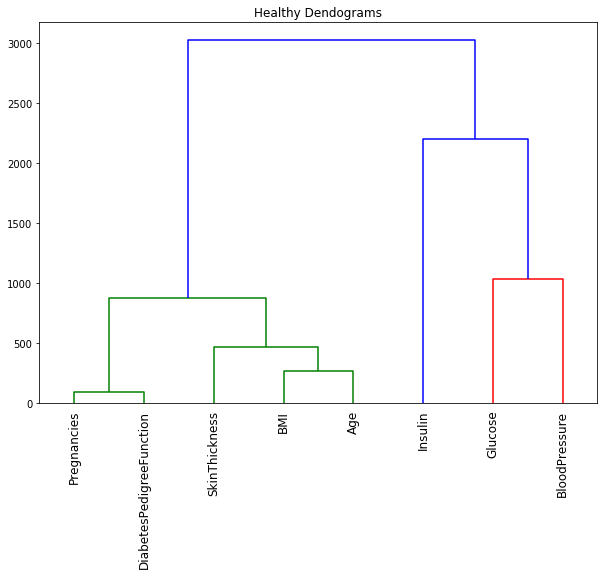

In [49]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Healthy Dendograms")
dend = shc.dendrogram(shc.linkage(clustering1_df, method='ward'),labels=clustering_df.index)
plt.xticks(rotation=90)
plt.show()

In [50]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
clustering_result = cluster.fit_predict(clustering1_df)

In [51]:
den1_df = pd.DataFrame([clustering1_df.index.tolist(),clustering_result.tolist()]).T
den1_df.columns = ['feature_name','cluster']
den1_df.sort_values(by=['cluster'])

,feature_name,cluster
1,Glucose,0
2,BloodPressure,0
0,Pregnancies,1
3,SkinThickness,1
5,BMI,1
6,DiabetesPedigreeFunction,1
7,Age,1
4,Insulin,2


In [52]:
den1_df['feature_name'] = den1_df['feature_name'] + ", "

In [53]:
den1_df.groupby('cluster')['feature_name'].sum()

cluster
0                             Glucose, BloodPressure, 
1    Pregnancies, SkinThickness, BMI, DiabetesPedig...
2                                            Insulin, 
Name: feature_name, dtype: object

## Normalization된 X로 Train/Test셋 나누기

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

## 4. 결정트리
각 요인의 중요도를 측정하기위해서 이 모델을 이용하게 되었습니다.  
결정트리 모델을 이용한 결과, 글루코스와 BMI, 연령이 중요도가 높게 측정되었습니다.

In [55]:
from sklearn.tree import DecisionTreeClassifier  
clf = DecisionTreeClassifier(random_state=0, max_depth = 3)  
clf.fit(X_train, y_train)  
print("train score:",clf.score(X_train, y_train))  
print("test score:",clf.score(X_test, y_test))  

train score: 0.7758620689655172
test score: 0.7608695652173914


In [56]:
fimp_df = pd.DataFrame([X.columns.tolist() , clf.feature_importances_.tolist()]).T
fimp_df.columns = ['feature','importance']

In [57]:
fimp_df

,feature,importance
0,Pregnancies,0
1,Glucose,0.754535
2,BloodPressure,0
3,SkinThickness,0
4,Insulin,0
5,BMI,0.0252636
6,DiabetesPedigreeFunction,0
7,Age,0.220202


## 5. 서포트백터머신
각 요인이 미치는 영향을 조사하기 위해서 서포트백신을 이용해 각요인을 1개씩 제거하여 나머지 7개에 대한 정확도를 측정하였습니다.  
요인의 영향도가 크면 그만큼 7개에 대한 정확도가 낮을 것 입니다.  
8개의 요인중에 글루코스를 뺀 나머지 7개의 요인에대한 정확도가 약69%로 나오며 다른 요인들과 비교해서 현저히 낮은결과가 나왔습니다.  
당뇨병 환자들한테 있어서 글루코스의 영향도가 크다고 생각 할 수 있습니다.  

from IPython.display import Image  
Image("data/feature_importance_SVM.JPG")  

In [37]:
from sklearn import svm
clf = svm.SVC(gamma='auto',C=0.1)
clf.fit(X_train, y_train)

print("train score:",clf.score(X_train, y_train))  
print("test score:",clf.score(X_test, y_test))  

train score: 0.75
test score: 0.7391304347826086


In [38]:
col_list = []
for i in range(len(X_scaled.columns)):
    tmp_list = X_scaled.columns.tolist()
    tmp_list.pop(i)
    col_list.append(tmp_list)
print(col_list)

[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], ['Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], ['Pregnancies', 'Glucose', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], ['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age'], ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction', 'Age'], ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age'], ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']]


In [39]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
349,0.683478,-0.388043,-0.596166,0.427920,-0.767160,-1.082739,-0.878385,-0.513669
328,-0.868661,-1.246348,-0.358590,0.167014,0.427188,0.742922,0.084991,-0.423761
33,0.062622,0.882248,0.888686,0.427920,0.271403,-0.484413,-0.940186,-0.513669
429,-0.247805,-0.628368,0.235351,-1.333198,-0.767160,-0.392363,-1.187392,-0.064128
354,-0.558233,-0.285046,0.472928,1.928133,0.686829,1.126465,-0.991082,-0.783394
...,...,...,...,...,...,...,...,...
71,1.304333,-1.246348,0.235351,0.688827,-0.767160,0.957706,0.034096,0.565230
106,-1.179089,-0.044721,-0.358590,-0.159119,0.188318,0.436089,1.008378,-0.873302
270,0.993905,0.538926,1.185657,-1.333198,-0.767160,-0.330996,-0.863843,1.554221
435,-0.868661,-0.319378,1.423233,-1.333198,-0.767160,0.113913,-0.663897,1.104680


In [40]:
result = []
for i in range(len(col_list)):
    tmp_X_train = X_train[col_list[i]]
    tmp_X_test = X_test[col_list[i]]
    
    from sklearn import svm
    clf = svm.SVC(gamma='auto',C=0.09)
    clf.fit(tmp_X_train, y_train)
    print("if ", X.columns[i], "is dropped")
    print("train score:",clf.score(tmp_X_train, y_train))  
    print("test score:",clf.score(tmp_X_test, y_test))  
    result.append((X.columns[i],clf.score(tmp_X_train, y_train)))
    
result

if  Pregnancies is dropped
train score: 0.7478448275862069
test score: 0.7565217391304347
if  Glucose is dropped
train score: 0.6530172413793104
test score: 0.6869565217391305
if  BloodPressure is dropped
train score: 0.7586206896551724
test score: 0.7434782608695653
if  SkinThickness is dropped
train score: 0.7607758620689655
test score: 0.7347826086956522
if  Insulin is dropped
train score: 0.7607758620689655
test score: 0.7434782608695653
if  BMI is dropped
train score: 0.7413793103448276
test score: 0.7478260869565218
if  DiabetesPedigreeFunction is dropped
train score: 0.7543103448275862
test score: 0.7391304347826086
if  Age is dropped
train score: 0.7306034482758621
test score: 0.7347826086956522


[('Pregnancies', 0.7478448275862069),
 ('Glucose', 0.6530172413793104),
 ('BloodPressure', 0.7586206896551724),
 ('SkinThickness', 0.7607758620689655),
 ('Insulin', 0.7607758620689655),
 ('BMI', 0.7413793103448276),
 ('DiabetesPedigreeFunction', 0.7543103448275862),
 ('Age', 0.7306034482758621)]

### SVM을 이용한 각 Feature에 대한 score

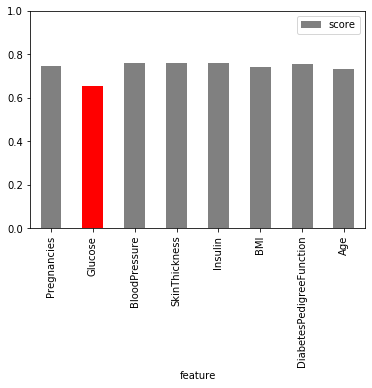

In [41]:
score_df = pd.DataFrame(result)
score_df.columns = ['feature','score']
score_df.plot.bar(x='feature',y='score',color=['gray','red','gray','gray','gray','gray','gray','gray'])
plt.ylim(0,1)
plt.show()

# feature조합별 모델별 성능

위에서의 분석결과를 참고하여 글루코스관련요인, 비만관련요인, 연령에 따른 요인이 당뇨병에 있어서 중요한 요인이라고 판단 되었습니다.  
따라서, 3개의 요인들만으로의 성능도를 측정하고 주성분 3개와 전체 성능도와도 비교하였습니다.  
데이터를 랜덤으로 학습용과 검증용 데이터 7:3으로  설정하였습니다.  

### Min-Max scaler사용

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X_mm_scaled = scaler.transform(X)

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_mm_scaled, y, test_size=0.3, random_state=42)

In [45]:
X_train = pd.DataFrame(X_train,columns=X.columns)
X_test = pd.DataFrame(X_test,columns=X.columns)

## 모든feature을 사용한 모델들의 성능평가

### LinearDiscriminantAnalysis 모델 성능

In [46]:
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X_train,y_train)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_mm_scaled, y, cv=5)
print("cross validation score:",scores)
print("mean score:",scores.mean())

cross validation score: [0.78417266 0.77697842 0.74100719 0.82733813 0.77536232]
mean score: 0.7809717443436555


### QuadraticDiscriminantAnalysis 모델 성능

In [47]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf = QuadraticDiscriminantAnalysis()
clf.fit(X_train,y_train)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_mm_scaled, y, cv=5)
print("cross validation score:",scores)
print("mean score:",scores.mean())

cross validation score: [0.76258993 0.74820144 0.71942446 0.8057554  0.75362319]
mean score: 0.7579188822854759


### LogisticRegression 모델 성능

In [48]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train,y_train)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_mm_scaled, y, cv=5)
print("cross validation score:",scores)
print("mean score:",scores.mean())

cross validation score: [0.77697842 0.76258993 0.75539568 0.82014388 0.78985507]
mean score: 0.7809925972265666


### DecisionTreeClassifier 모델성능

### gini와 entropy성능비교

In [49]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42, max_depth = 3)
clf.fit(X_train,y_train)
print("train score:",clf.score(X_train, y_train))
print("test score:",clf.score(X_test, y_test))
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_mm_scaled, y, cv=5)
print("cross validation score:",scores)
print("mean score:",scores.mean())

train score: 0.7690721649484537
test score: 0.7751196172248804
cross validation score: [0.69064748 0.74820144 0.73381295 0.74100719 0.73913043]
mean score: 0.7305598999061619


In [51]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth = 3)
clf.fit(X_train, y_train)
print("train score:",clf.score(X_train, y_train))
print("test score:",clf.score(X_test, y_test))
entropy = clf.feature_importances_
scores = cross_val_score(clf, X_mm_scaled, y, cv=5)
print("cross validation score:",scores)
print("mean score:",scores.mean())

train score: 0.7690721649484537
test score: 0.7751196172248804
cross validation score: [0.74820144 0.74820144 0.73381295 0.73381295 0.74637681]
mean score: 0.7420811177145239


In [52]:
cart = pd.DataFrame([X.columns, gini,entropy]).T
cart.columns = ['feature','gini','entropy']
cart

,feature,gini,entropy
0,Pregnancies,0,0
1,Glucose,0.722889,0.537325
2,BloodPressure,0,0
3,SkinThickness,0,0
4,Insulin,0,0
5,BMI,0.0336537,0.214975
6,DiabetesPedigreeFunction,0,0
7,Age,0.243457,0.2477


### KNeighborsClassifier 모델성능

In [74]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=13)
neigh.fit(X_train, y_train)
print("train score:",neigh.score(X_train, y_train))
print("test score:",neigh.score(X_test, y_test))
scores = cross_val_score(neigh, X_mm_scaled, y, cv=5)
print("cross validation score:",scores)
print("mean score:",scores.mean())

train score: 0.777319587628866
test score: 0.7511961722488039
cross validation score: [0.74820144 0.73381295 0.72661871 0.8057554  0.76086957]
mean score: 0.7550516108852049


### SupportVectorMachine 모델성능

In [75]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_scaled, y)
print("train score:",clf.score(X_train, y_train))
print("test score:",clf.score(X_test, y_test))
scores = cross_val_score(clf, X_mm_scaled, y, cv=5)
print("cross validation score:",scores)
print("mean score:",scores.mean())

train score: 0.6618556701030928
test score: 0.6555023923444976
cross validation score: [0.76978417 0.76978417 0.72661871 0.83453237 0.78985507]
mean score: 0.77811489938484


## 주성분3개의 feature만을 사용한 모델들의 성능평가

In [82]:
#주성분분석
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X)
principalComponents = pca.transform(X)

In [83]:
principalDf = pd.DataFrame(data=principalComponents, columns={'com1', 'com2', 'com3'}) 
len(principalDf)

694

In [84]:
from sklearn.model_selection import train_test_split
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(principalDf, y, test_size=0.3, random_state=42)

### LinearDiscriminantAnalysis 모델성능

In [85]:
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X_train_pca,y_train_pca)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, principalDf, y, cv=5)
print("cross validation score:",scores)
print("mean score:",scores.mean())

cross validation score: [0.70503597 0.72661871 0.70503597 0.77697842 0.78985507]
mean score: 0.740704827442394


###  QuadraticDiscriminantAnalysis 모델성능

In [86]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf = QuadraticDiscriminantAnalysis()
clf.fit(X_train_pca,y_train_pca)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_mm_scaled, y, cv=5)
print("cross validation score:",scores)
print("mean score:",scores.mean())

cross validation score: [0.76258993 0.74820144 0.71942446 0.8057554  0.75362319]
mean score: 0.7579188822854759


### LogisticRegression 모델성능

In [87]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train_pca,y_train_pca)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_mm_scaled, y, cv=5)
print("cross validation score:",scores)
print("mean score:",scores.mean())

cross validation score: [0.77697842 0.76258993 0.75539568 0.82014388 0.78985507]
mean score: 0.7809925972265666


### KNeighborsClassifier 모델성능

In [88]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=13)
neigh.fit(X_train_pca, y_train_pca)
print("train score:",neigh.score(X_train_pca, y_train_pca))
print("test score:",neigh.score(X_test_pca, y_test_pca))
scores = cross_val_score(neigh, X_mm_scaled, y, cv=5)
print("cross validation score:",scores)
print("mean score:",scores.mean())

train score: 0.7587628865979381
test score: 0.7464114832535885
cross validation score: [0.74820144 0.73381295 0.72661871 0.8057554  0.76086957]
mean score: 0.7550516108852049


### DecisionTreeClassifier 모델성능

### gini와 entropy의 성능비교

In [89]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42, max_depth = 3)
clf.fit(X_train_pca,y_train_pca)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_mm_scaled, y, cv=5)
print("cross validation score:",scores)
print("mean score:",scores.mean())

cross validation score: [0.69064748 0.74820144 0.73381295 0.74100719 0.73913043]
mean score: 0.7305598999061619


In [91]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth = 3)
clf.fit(X_train_pca, y_train_pca)
print("train score:",clf.score(X_train_pca, y_train_pca))
print("test score:",clf.score(X_test_pca, y_test_pca))
entropy = clf.feature_importances_
scores = cross_val_score(clf, X_mm_scaled, y, cv=5)
print("cross validation score:",scores)
print("mean score:",scores.mean())

train score: 0.7835051546391752
test score: 0.7559808612440191
cross validation score: [0.74820144 0.74820144 0.73381295 0.73381295 0.74637681]
mean score: 0.7420811177145239


In [92]:
cart = pd.DataFrame([X.columns, gini,entropy]).T
cart.columns = ['feature','gini','entropy']
cart

,feature,gini,entropy
0,Pregnancies,0,0.0322849
1,Glucose,0.908815,0.849261
2,BloodPressure,0.0911845,0.118454
3,SkinThickness,None,None
4,Insulin,None,None
5,BMI,None,None
6,DiabetesPedigreeFunction,None,None
7,Age,None,None


### SupportVectorMachine 모델성능

In [95]:
from sklearn.svm import SVC

clf = SVC(gamma='auto',C=0.1)
clf.fit(X_train_pca, y_train_pca)
print("train score:",clf.score(X_train_pca, y_train_pca))
print("test score:",clf.score(X_test_pca, y_test_pca))
scores = cross_val_score(clf, X_mm_scaled, y, cv=5)
print("cross validation score:",scores)
print("mean score:",scores.mean())

train score: 0.6556701030927835
test score: 0.6842105263157895
cross validation score: [0.66906475 0.6618705  0.6618705  0.6618705  0.66666667]
mean score: 0.6642685851318945


### [glucose, BMI, age] machine learning 유의미한 3개 feature만을 사용하여 모델별 성능평가

In [96]:
X_train_3 = X_train[[ 'Glucose', 'BMI', 'Age']]
X_test_3 = X_test[[ 'Glucose', 'BMI', 'Age']]

### LinearDiscriminantAnalysis 모델성능

In [97]:
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X_train_3,y_train)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_mm_scaled, y, cv=5)
print("cross validation score:",scores)
print("mean score:",scores.mean())

cross validation score: [0.78417266 0.77697842 0.74100719 0.82733813 0.77536232]
mean score: 0.7809717443436555


In [ ]:
LDA의 경우 CV에서 수치가 80이상으로 뛰는 경우가 있어서 robustness한 모델이 아님을 알 수 있다


### QuadraticDiscriminantAnalysis 모델성능

In [98]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf = QuadraticDiscriminantAnalysis()
clf.fit(X_train_3,y_train)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_mm_scaled, y, cv=5)
print("cross validation score:",scores)
print("mean score:",scores.mean())

cross validation score: [0.76258993 0.74820144 0.71942446 0.8057554  0.75362319]
mean score: 0.7579188822854759


###  LogisticRegression 모델성능

In [99]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train_3,y_train)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_mm_scaled, y, cv=5)
print("cross validation score:",scores)
print("mean score:",scores.mean())

cross validation score: [0.77697842 0.76258993 0.75539568 0.82014388 0.78985507]
mean score: 0.7809925972265666


### DecisionTreeClassifier 모델성능

### gini와 entropy의 성능비교

In [100]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42, max_depth = 3)
clf.fit(X_train_3,y_train)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_mm_scaled, y, cv=5)
print("cross validation score:",scores)
print("mean score:",scores.mean())

cross validation score: [0.69064748 0.74820144 0.73381295 0.74100719 0.73913043]
mean score: 0.7305598999061619


In [103]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth = 3)
clf.fit(X_train_3, y_train)
print("train score:",clf.score(X_train_3, y_train))
print("test score:",clf.score(X_test_3, y_test))
entropy = clf.feature_importances_
scores = cross_val_score(clf, X_mm_scaled, y, cv=5)
print("cross validation score:",scores)
print("mean score:",scores.mean())

train score: 0.7690721649484537
test score: 0.7751196172248804
cross validation score: [0.74820144 0.74820144 0.73381295 0.73381295 0.74637681]
mean score: 0.7420811177145239


In [104]:
cart = pd.DataFrame([X.columns, gini,entropy]).T
cart.columns = ['feature','gini','entropy']
cart

,feature,gini,entropy
0,Pregnancies,0.722889,0.537325
1,Glucose,0.0336537,0.214975
2,BloodPressure,0.243457,0.2477
3,SkinThickness,None,None
4,Insulin,None,None
5,BMI,None,None
6,DiabetesPedigreeFunction,None,None
7,Age,None,None


### KNeighborsClassifier 모델성능

In [105]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=13)
neigh.fit(X_train_3, y_train)
print("train score:",neigh.score(X_train_3, y_train))
print("test score:",neigh.score(X_test_3, y_test))
scores = cross_val_score(neigh, X_mm_scaled, y, cv=5)
print("cross validation score:",scores)
print("mean score:",scores.mean())

train score: 0.7835051546391752
test score: 0.7703349282296651
cross validation score: [0.74820144 0.73381295 0.72661871 0.8057554  0.76086957]
mean score: 0.7550516108852049


### SupportVectorMachine 모델성능

In [108]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

clf =SVC(gamma='auto',C=0.1)
clf.fit(X_train_3, y_train)
print("train score:",clf.score(X_train_3, y_train))
print("test score:",clf.score(X_test_3, y_test))
scores = cross_val_score(clf, X_mm_scaled, y, cv=5)
print("cross validation score:",scores)
print("mean score:",scores.mean())

train score: 0.6556701030927835
test score: 0.6842105263157895
cross validation score: [0.66906475 0.6618705  0.6618705  0.6618705  0.66666667]
mean score: 0.6642685851318945


# 결과

여러가지 모델을 사용해서 성능도를 측정한 결과 제안한 3개의 요인들만으로도 동등이상의 높은 예측성능도를 얻을 수 있습니다.  
당뇨병에 있어서 이 3개의 요인들이 영향이 크기때문에 주의할 필요가 있습니다.  

In [ ]:
해결책방향은 자가진단이 가능한지를 
glucose, age, BMI가 간단하게 자가진단이 되는지 
기대할 수 있는 점

당 수치를 측정 하는 혈당 측정기를 통해 자신의 혈당수치를 체크한다
병원에 방문해서 여러가지 검사를 통해 당뇨병을 진단받거나 경과를 지켜보는데 시간이나 돈에 구애를 받는다.
사전에 유의미한 3개의 feature만으로의 자가진단을 통해 직접 방문하지 않고 당뇨병을 체크한다.
자가진단을 통하여 질병의 조기발견이나 상시로 체크할 수 있기때문에 합병증 예방이 될 수 있다.
